In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp
from scipy.optimize import minimize
from bayes_opt import BayesianOptimization

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml

# Exercise 4-1
Derive in closed form the 3 × 3 matrix which results from a leastsquares regression to a parabolic fit $f(x) = Ax^2 + Bx + C$.

The least squares regression problem aims to minimize the sum of squared residuals given by:

$$\sum_{i=1}^n (y_i - Ax^2+Bx+C)^2$$

To find the optimal values of A, B, and C that minimize S, we need to take the partial derivatives of S with respect to each coefficient and set them to zero.

The partial derivative of S with respect to A is:

$$\frac{\partial S}{\partial A} = \sum_{i=1}^n 2(y_i - Ax^2+Bx+C)(-x^2) = 0$$

The partial derivative of S with respect to B is:

$$\frac{\partial S}{\partial B} = \sum_{i=1}^n 2(y_i - Ax^2+Bx+C)(-x) = 0$$

The partial derivative of S with respect to C is:

$$\frac{\partial S}{\partial C} = \sum_{i=1}^n 2(y_i - Ax^2+Bx+C)(-1) = 0$$

Now, let's simplify these equations to obtain the closed-form solution for A, B, and C.

Expanding the summations, we get:

$$\sum_{i=1}^n x_i^2y_i - Ax_i^4 + Bx_i^3 - Cx_i^2 = 0$$

$$\sum_{i=1}^n x_iy_i - Ax_i^3 + Bx_i^2 - Cx_i = 0$$

$$\sum_{i=1}^n y_i - Ax_i^2 + Bx_i - Cn = 0$$

These equations can be rewritten in matrix form as:

$$\begin{bmatrix}
\sum_{i=1}^n x_i^4 & \sum_{i=1}^n x_i^3 & \sum_{i=1}^n x_i^2 \\
\sum_{i=1}^n x_i^3 & \sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i \\
\sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i & n
\end{bmatrix}
\begin{bmatrix}
A \\
B \\
C
\end{bmatrix}
=
\begin{bmatrix}
\sum_{i=1}^n x_i^2y_i \\
\sum_{i=1}^n x_iy_i \\
\sum_{i=1}^n y_i
\end{bmatrix}$$

Giving the solution:

$$
\begin{bmatrix}
A \\
B \\
C
\end{bmatrix}
=
\begin{bmatrix}
\sum_{i=1}^n x_i^4 & \sum_{i=1}^n x_i^3 & \sum_{i=1}^n x_i^2 \\
\sum_{i=1}^n x_i^3 & \sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i \\
\sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i & n
\end{bmatrix}^{-1}

\begin{bmatrix}
\sum_{i=1}^n x_i^2y_i \\
\sum_{i=1}^n x_iy_i \\
\sum_{i=1}^n y_i
\end{bmatrix}$$

# Exercise 4-2

Consider the following temperature data taken over a 24-hour
(military time) cycle:

| Temperature | Time |
|-------------|------|
| 75  | 01   |
| 77  | 02   |
| 76  | 03   |
| 73  | 04   |
| 69  | 05   |
| 68  | 06   |
| 63  | 07   |
| 59  | 08   |
| 57  | 09   |
| 55  | 10   |
| 54  | 11   |
| 52  | 12   |
| 50  | 13   |
| 50  | 14   |
| 49  | 15   |
| 49  | 16   |
| 49  | 17   |
| 50  | 18   |
| 54  | 19   |
| 56  | 20   |
| 59  | 21   |
| 63  | 22   |
| 67  | 23   |
| 72  | 24   |


Fit the data with the parabolic fit

$$f(x) = Ax^2 + Bx + C$$

and calcualte the $E_2$ error. Use both a linear and spline to generate an interpolated approximation of the data for $x=1 : 0.01 : 24$.

Develop a least-squares algorithm and calculate $E_2$ for

$$y= A\cos(Bx) + C$$

Evaluate the resulting fit as a function of the initial guess for the values of $A$, $B$,
and $C$.

In [2]:
temperatures = [75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72]
time = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

x = np.array(time)
y = np.array(temperatures)


[A, B, C] = np.linalg.inv([[np.sum(x**4),np.sum(x**3),np.sum(x**2)],[np.sum(x**3),np.sum(x**2),np.sum(x)],[np.sum(x**2),np.sum(x),len(x)]]) @ [np.sum(x**2*y), np.sum(x*y), np.sum(y)]

print("A = ", round(A,3))
print("B = ", round(B,3))
print("C = ", round(C,3))

A =  0.185
B =  -5.264
C =  88.295


In [3]:
y_fit = A * x**2 + B * x + C

# Calculate E2 error
e2_error = np.sum((y - y_fit)**2)

print(f"E2 error: {e2_error}")

E2 error: 172.35927637579823


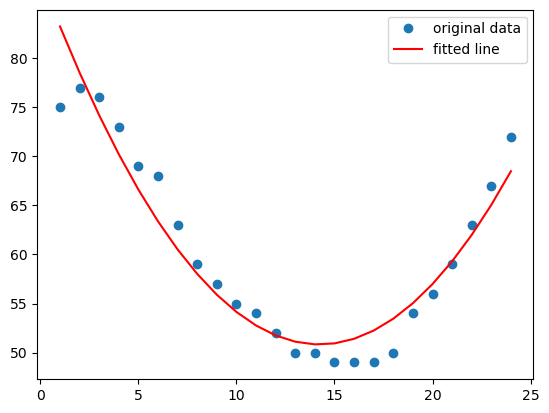

In [4]:
# plot the data and the regression line
plt.plot(x, y, 'o', label='original data')
plt.plot(x, A*x**2 + B*x + C, 'r', label='fitted line')
plt.legend()
plt.show()

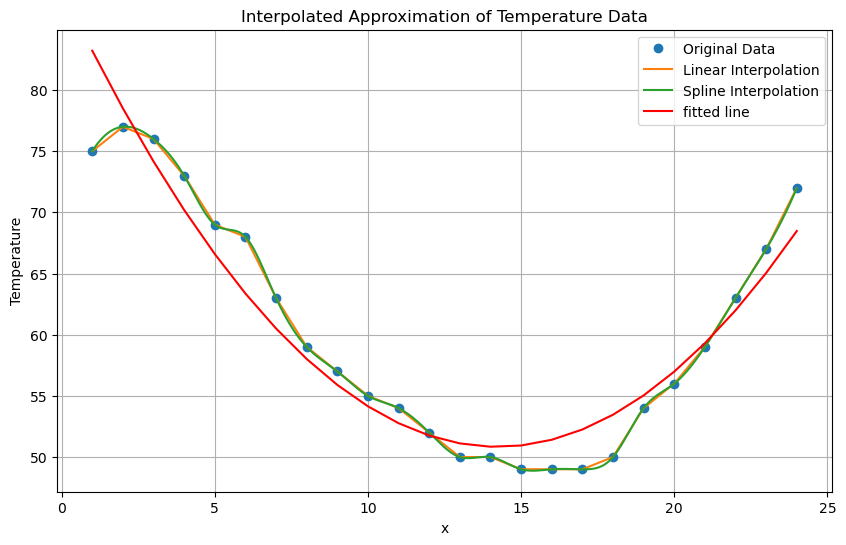

In [5]:
# Linear interpolation
linear_interp = sp.interpolate.interp1d(x, y, kind='linear')

# Spline interpolation
spline_interp = sp.interpolate.interp1d(x, y, kind='cubic')

# Generate interpolated x values
interpolated_x = np.arange(1, 24, 0.01)

# Perform interpolation
linear_y = linear_interp(interpolated_x)
spline_y = spline_interp(interpolated_x)

# Plot the original data and interpolated approximations
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original Data')
plt.plot(interpolated_x, linear_y, label='Linear Interpolation')
plt.plot(interpolated_x, spline_y, label='Spline Interpolation')
plt.plot(x, A*x**2 + B*x + C, 'r', label='fitted line')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Interpolated Approximation of Temperature Data')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
def equation(x, A, B, C):
    return A * np.cos(B * x) + C

def residual(params, x, y):
    A, B, C = params
    return equation(x, A, B, C) - y

# Define the objective function
def objective(A, B, C):
    # Perform least squares fitting
    result = sp.optimize.least_squares(residual, [A,B,C], args=(x, y))

    # Get the optimized parameters
    A_out, B_out, C_out = result.x

    # Calculate the fitted values
    y_fit = equation(x, A_out, B_out, C_out)

    # Calculate E2 error
    e2_error = np.sum((y - y_fit)**2)

    return -e2_error


# Define the bounds for the parameters A, B, and C
pbounds = {'A': (0.0, 10.0), 'B': (0.0, 10.0), 'C': (0.0, 10.0)}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=1)
optimizer.maximize(init_points=5, n_iter=50)

# Get the optimized parameters
A_opt_bay, B_opt_bay, C_opt_bay = optimizer.max['params']['A'], optimizer.max['params']['B'], optimizer.max['params']['C']

print(f"Optimized parameters: A = {A_opt_bay}, B = {B_opt_bay}, C = {C_opt_bay}")

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 1         | -2.09e+03 | 4.17      | 7.203     | 0.001144  |
| 2         | -2.144e+0 | 3.023     | 1.468     | 0.9234    |
| 3         | -2.131e+0 | 1.863     | 3.456     | 3.968     |
| 4         | -2.144e+0 | 5.388     | 4.192     | 6.852     |
| 5         | -2.115e+0 | 2.045     | 8.781     | 0.2739    |
| 6         | -2.144e+0 | 5.719     | 8.353     | 0.0       |
| 7         | -2.144e+0 | 5.323     | 7.874     | 1.749     |
| 8         | -2.144e+0 | 5.958     | 2.61      | 7.467     |
| 9         | -2.09e+03 | 4.241     | 7.162     | 0.303     |
| 10        | -2.016e+0 | 3.195     | 6.539     | 0.326     |
| 11        | -2.016e+0 | 2.618     | 5.714     | 0.2674    |
| 12        | -2.132e+0 | 2.222     | 6.336     | 1.512     |
| 13        | -2.115e+0 | 3.545     | 5.61      | 0.0       |
| 14        | -2.143e+0 | 2.614     | 6.335     | 0.1109    |
| 15    

Optimized parameters: A = 3.3229028923729826, B = 6.577939844479594, C = 0.37206816492606726
E2 error: 37.584210795317645


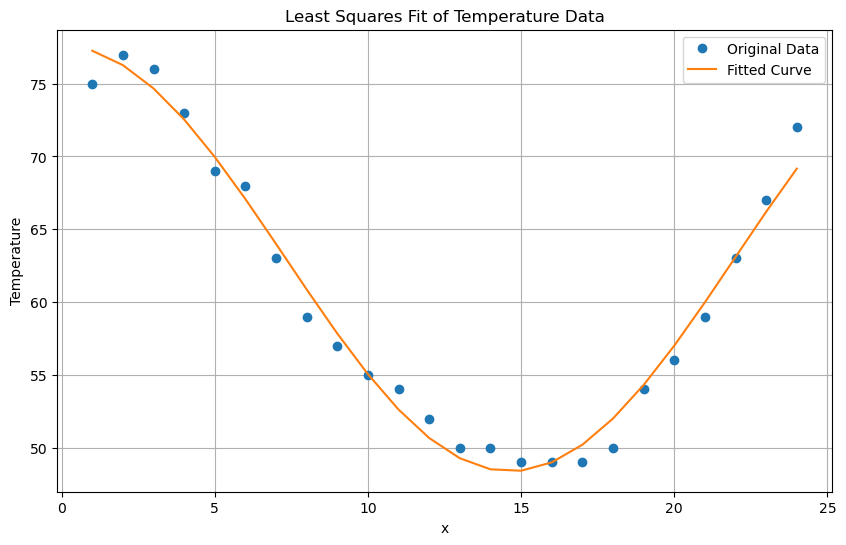

In [7]:
initial_guess = [A_opt_bay, B_opt_bay, C_opt_bay]

# Perform least squares fitting
result = sp.optimize.least_squares(residual, initial_guess, args=(x, y))

# Get the optimized parameters
A_opt, B_opt, C_opt = result.x

# Calculate the fitted values
y_fit = equation(x, A_opt, B_opt, C_opt)

# Calculate E2 error
e2_error = np.sum((y - y_fit)**2)

print(f"Optimized parameters: A = {A_opt_bay}, B = {B_opt_bay}, C = {C_opt_bay}")
print(f"E2 error: {e2_error}")

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x, y_fit, label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Least Squares Fit of Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 4-3
For the temperature data of the previous example, consider a polynomial fit of the form

 $$ f(x) = \sum_{k=0}^{10} a_k x^k $$

where the loadings $a_k$ are the coefficients to be determined four regression techniques: leastsquares, LASSO, ridge, and elastic net. Compare the models for each against
each other.
Randomly pick any time point and corrupt the temperature measurement at that location. For instance, the temperature reading at that location could be zero. Investigate the resulting model and E2 error for the four regression techniques considered. Identify the models that are robust to such an outlier and those that are not. Explicitly calculate the variance of the loading coefficients αk for each method for a number of random trials with one or more corrupt data points.

Linear Regression Coefficients:
[ 0.00000000e+00  3.00783018e+01 -1.90611383e+01  6.34791834e+00
 -1.30501007e+00  1.69763366e-01 -1.41290027e-02  7.48181230e-04
 -2.43412012e-05  4.43132691e-07 -3.45402995e-09]

LASSO Regression Coefficients:
[ 0.00000000e+00 -0.00000000e+00 -3.09503532e-01  9.50450613e-03
  1.80391481e-04  1.99112855e-06 -1.05419361e-08 -1.76244432e-09
 -8.24482335e-11 -3.03369265e-12 -9.81656575e-14]

Ridge Regression Coefficients:
[ 0.00000000e+00  3.24190940e-01  3.70453916e-01 -7.09008231e-02
 -6.99856277e-02  2.14342235e-02 -2.66753823e-03  1.78277709e-04
 -6.71900770e-06  1.34821005e-07 -1.12237989e-09]

Elastic Net Regression Coefficients:
[ 0.00000000e+00 -1.93407465e-01 -2.98028957e-01  9.76597546e-03
  1.66593962e-04  1.60844362e-06 -1.84948144e-08 -1.82295520e-09
 -7.69108877e-11 -2.58094564e-12 -7.35963016e-14]

Root Mean Squared Error (RMSE):
Linear Regression: 0.5251490672123931
LASSO Regression: 1.2382313448279005
Ridge Regression: 0.6016506767898683
E

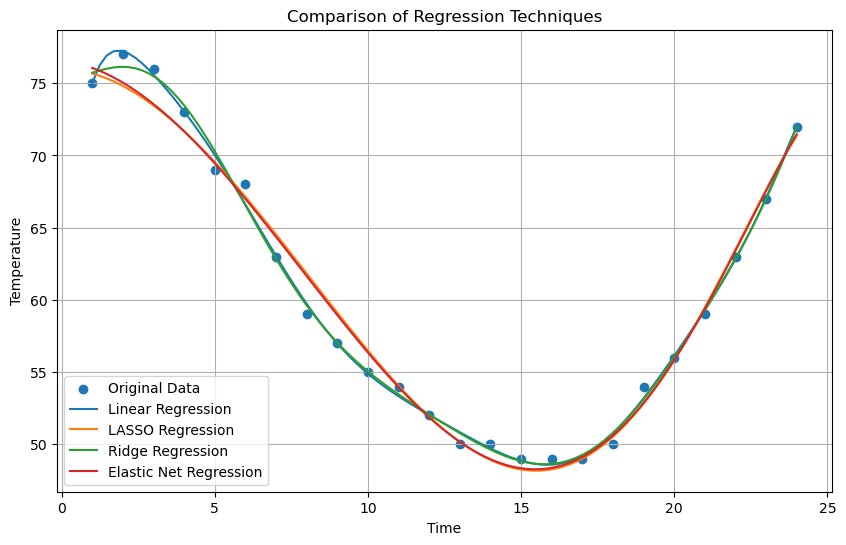

In [3]:
# Reshape the x data for scikit-learn
X = x.reshape(-1, 1)

# Generate polynomial features up to degree 10
poly_features = PolynomialFeatures(degree=10, include_bias=True)
X_poly = poly_features.fit_transform(X)

# Perform regression using different techniques
linear_regression = LinearRegression()
lasso_regression = Lasso()
ridge_regression = Ridge()
elastic_net_regression = ElasticNet()


# Fit the models
linear_regression.fit(X_poly, temperatures)
lasso_regression.fit(X_poly, temperatures)
ridge_regression.fit(X_poly, temperatures)
elastic_net_regression.fit(X_poly, temperatures)

# Print the coefficients
print("Linear Regression Coefficients:")
print(linear_regression.coef_)

print("\nLASSO Regression Coefficients:")
print(lasso_regression.coef_)

print("\nRidge Regression Coefficients:")
print(ridge_regression.coef_)

print("\nElastic Net Regression Coefficients:")
print(elastic_net_regression.coef_)


y_linear_pred = linear_regression.predict(X_poly)
y_lasso_pred = lasso_regression.predict(X_poly)
y_ridge_pred = ridge_regression.predict(X_poly)
y_elastic_net_pred = elastic_net_regression.predict(X_poly)

linear_rmse = np.sqrt(mean_squared_error(temperatures, y_linear_pred))
lasso_rmse = np.sqrt(mean_squared_error(temperatures, y_lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(temperatures, y_ridge_pred))
elastic_net_rmse = np.sqrt(mean_squared_error(temperatures, y_elastic_net_pred))

print("\nRoot Mean Squared Error (RMSE):")
print("Linear Regression:", linear_rmse)
print("LASSO Regression:", lasso_rmse)
print("Ridge Regression:", ridge_rmse)
print("Elastic Net Regression:", elastic_net_rmse)


# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.scatter(x, temperatures, label='Original Data')

# Generate x values for the regression lines
x_reg = np.linspace(1, len(temperatures), 100)
X_reg_poly = poly_features.transform(x_reg.reshape(-1, 1))

# Predict the temperatures using the fitted models
y_linear = linear_regression.predict(X_reg_poly)
y_lasso = lasso_regression.predict(X_reg_poly)
y_ridge = ridge_regression.predict(X_reg_poly)
y_elastic_net = elastic_net_regression.predict(X_reg_poly)

plt.plot(x_reg, y_linear, label='Linear Regression')
plt.plot(x_reg, y_lasso, label='LASSO Regression')
plt.plot(x_reg, y_ridge, label='Ridge Regression')
plt.plot(x_reg, y_elastic_net, label='Elastic Net Regression')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Regression Techniques')
plt.legend()
plt.grid(True)
plt.show()

Linear Regression Coefficients:
[ 0.00000000e+00  6.93550083e+02 -4.93649269e+02  1.70831760e+02
 -3.37178701e+01  4.10667612e+00 -3.19749277e-01  1.59622231e-02
 -4.94473016e-04  8.65565078e-06 -6.54414407e-08]

LASSO Regression Coefficients:
[ 0.00000000e+00 -7.71042035e-01 -4.56279968e-02  6.40285867e-05
  2.96943876e-05  3.25127658e-06  1.25570759e-07  2.85858711e-09
  1.16410583e-11 -3.17590822e-12 -2.41398875e-13]

Ridge Regression Coefficients:
[ 0.00000000e+00  3.36913944e-01 -2.55166803e+00 -3.72174963e+00
  2.09577601e+00 -4.42748270e-01  4.94751579e-02 -3.20715311e-03
  1.21357251e-04 -2.49128804e-06  2.14616360e-08]

Elastic Net Regression Coefficients:
[ 0.00000000e+00 -8.22593121e-01 -4.55672130e-02  3.97172415e-04
  2.16252143e-05  3.07850362e-06  1.22325648e-07  2.83509346e-09
  1.36650890e-11 -3.01511999e-12 -2.32885449e-13]

Root Mean Squared Error (RMSE):
Linear Regression: 10.88456496068386
LASSO Regression: 13.617036523754294
Ridge Regression: 12.164474074961552
El

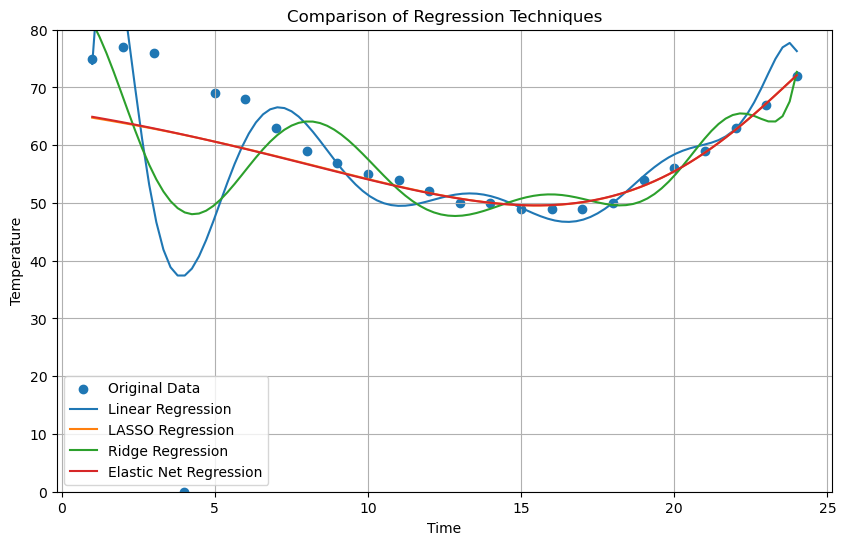

In [4]:
X = x.reshape(-1, 1)

# Generate polynomial features up to degree 10
poly_features = PolynomialFeatures(degree=10, include_bias=True)
X_poly = poly_features.fit_transform(X)

# Perform regression using different techniques
linear_regression = LinearRegression()
lasso_regression = Lasso()
ridge_regression = Ridge()
elastic_net_regression = ElasticNet()

corrupt_temp = np.copy(temperatures)

random_index = np.random.randint(0, len(temperatures) - 1)

# Corrupt the element at the random index
corrupt_temp[random_index] = 0


# Fit the models
linear_regression.fit(X_poly, corrupt_temp)
lasso_regression.fit(X_poly, corrupt_temp)
ridge_regression.fit(X_poly, corrupt_temp)
elastic_net_regression.fit(X_poly, corrupt_temp)

# Print the coefficients
print("Linear Regression Coefficients:")
print(linear_regression.coef_)

print("\nLASSO Regression Coefficients:")
print(lasso_regression.coef_)

print("\nRidge Regression Coefficients:")
print(ridge_regression.coef_)

print("\nElastic Net Regression Coefficients:")
print(elastic_net_regression.coef_)


y_linear_pred = linear_regression.predict(X_poly)
y_lasso_pred = lasso_regression.predict(X_poly)
y_ridge_pred = ridge_regression.predict(X_poly)
y_elastic_net_pred = elastic_net_regression.predict(X_poly)

linear_rmse = np.sqrt(mean_squared_error(corrupt_temp, y_linear_pred))
lasso_rmse = np.sqrt(mean_squared_error(corrupt_temp, y_lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(corrupt_temp, y_ridge_pred))
elastic_net_rmse = np.sqrt(mean_squared_error(corrupt_temp, y_elastic_net_pred))

print("\nRoot Mean Squared Error (RMSE):")
print("Linear Regression:", linear_rmse)
print("LASSO Regression:", lasso_rmse)
print("Ridge Regression:", ridge_rmse)
print("Elastic Net Regression:", elastic_net_rmse)


# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.scatter(x, corrupt_temp, label='Original Data')

# Generate x values for the regression lines
x_reg = np.linspace(1, len(corrupt_temp), 100)
X_reg_poly = poly_features.transform(x_reg.reshape(-1, 1))

# Predict the temperatures using the fitted models
y_linear = linear_regression.predict(X_reg_poly)
y_lasso = lasso_regression.predict(X_reg_poly)
y_ridge = ridge_regression.predict(X_reg_poly)
y_elastic_net = elastic_net_regression.predict(X_reg_poly)

plt.plot(x_reg, y_linear, label='Linear Regression')
plt.plot(x_reg, y_lasso, label='LASSO Regression')
plt.plot(x_reg, y_ridge, label='Ridge Regression')
plt.plot(x_reg, y_elastic_net, label='Elastic Net Regression')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Regression Techniques')
plt.ylim(0, 80)
plt.legend()
plt.grid(True)
plt.show()

Variance of coefficients for Linear Regression:
[2.98567526e+04 1.07266927e+05 5.27785647e+04 6.74394565e+03
 2.92066328e+02 4.89497087e+00 3.36577547e-02 9.49388126e-05
 1.02618438e-07 3.52058984e-11 2.23895782e-15]

Variance of coefficients for LASSO Regression:
[1.08681433e+02 8.22561495e+00 3.85474700e-02 4.34832239e-05
 2.85061655e-08 5.99375720e-11 7.07612037e-14 4.33765416e-17
 1.89137492e-20 1.37124649e-22 7.14195138e-25]

Variance of coefficients for Ridge Regression:
[2.71269790e+02 1.05010035e+01 1.33002146e+01 8.19468209e+00
 1.31328468e+00 5.44289370e-02 7.09287328e-04 3.21311070e-06
 5.00577652e-09 2.29775996e-12 1.85334874e-16]

Variance of coefficients for Elastic Net Regression:
[6.22473431e+01 2.70037779e+00 1.31358190e-02 7.35604035e-05
 2.05113670e-08 6.20452886e-11 7.81534276e-14 4.76728524e-17
 1.71840591e-20 1.33640993e-22 7.22467309e-25]


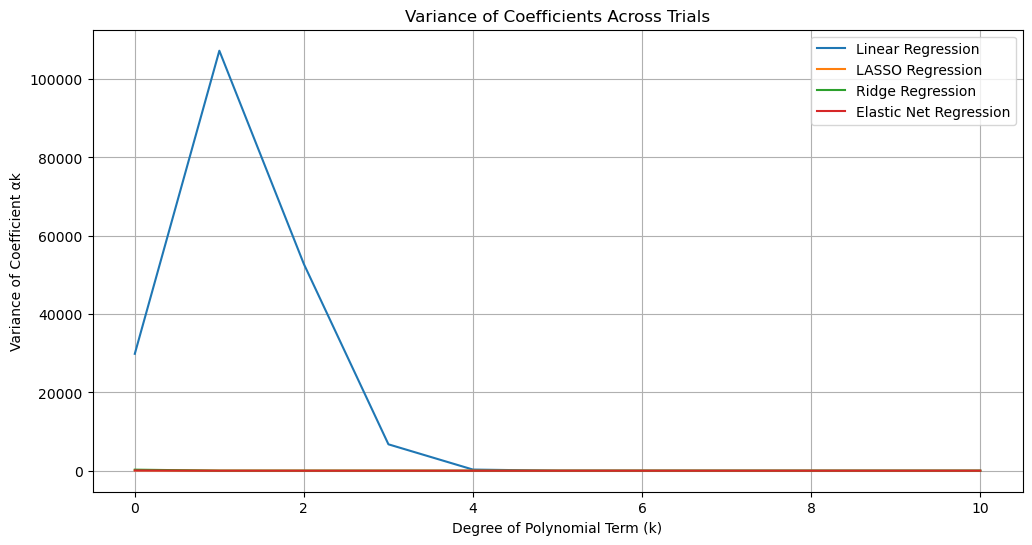

In [17]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Number of trials
n_trials = 100

# Arrays to store coefficients for each trial
coeffs_linear = np.zeros((n_trials, 11))
coeffs_lasso = np.zeros((n_trials, 11))
coeffs_ridge = np.zeros((n_trials, 11))
coeffs_elastic_net = np.zeros((n_trials, 11))

# Loop over trials
for i in range(n_trials):
    # Copy temperatures to corrupt_temp
    corrupt_temp = np.copy(temperatures)

    # Randomly corrupt one data point
    random_index = np.random.randint(0, len(temperatures))
    corrupt_temp[random_index] = 0

    # Perform regression using different techniques
    linear_regression = LinearRegression()
    lasso_regression = Lasso()
    ridge_regression = Ridge()
    elastic_net_regression = ElasticNet()

    # Fit the models
    linear_regression.fit(X_poly, corrupt_temp)
    lasso_regression.fit(X_poly, corrupt_temp)
    ridge_regression.fit(X_poly, corrupt_temp)
    elastic_net_regression.fit(X_poly, corrupt_temp)

    # Extract coefficients (including intercept)
    alpha_linear = np.hstack([linear_regression.intercept_, linear_regression.coef_])
    alpha_lasso = np.hstack([lasso_regression.intercept_, lasso_regression.coef_])
    alpha_ridge = np.hstack([ridge_regression.intercept_, ridge_regression.coef_])
    alpha_elastic_net = np.hstack([elastic_net_regression.intercept_, elastic_net_regression.coef_])

    # Store coefficients
    coeffs_linear[i, :] = alpha_linear
    coeffs_lasso[i, :] = alpha_lasso
    coeffs_ridge[i, :] = alpha_ridge
    coeffs_elastic_net[i, :] = alpha_elastic_net

# Calculate variance of coefficients across trials
var_linear = np.var(coeffs_linear, axis=0)
var_lasso = np.var(coeffs_lasso, axis=0)
var_ridge = np.var(coeffs_ridge, axis=0)
var_elastic_net = np.var(coeffs_elastic_net, axis=0)

# Print the variances
print("Variance of coefficients for Linear Regression:")
print(var_linear)

print("\nVariance of coefficients for LASSO Regression:")
print(var_lasso)

print("\nVariance of coefficients for Ridge Regression:")
print(var_ridge)

print("\nVariance of coefficients for Elastic Net Regression:")
print(var_elastic_net)

# Plot variances for comparison
degrees = np.arange(0, 11)
plt.figure(figsize=(12, 6))
plt.plot(degrees, var_linear, label='Linear Regression')
plt.plot(degrees, var_lasso, label='LASSO Regression')
plt.plot(degrees, var_ridge, label='Ridge Regression')
plt.plot(degrees, var_elastic_net, label='Elastic Net Regression')
plt.xlabel('Degree of Polynomial Term (k)')
plt.ylabel('Variance of Coefficient αk')
plt.title('Variance of Coefficients Across Trials')
plt.legend()
plt.grid(True)
plt.show()

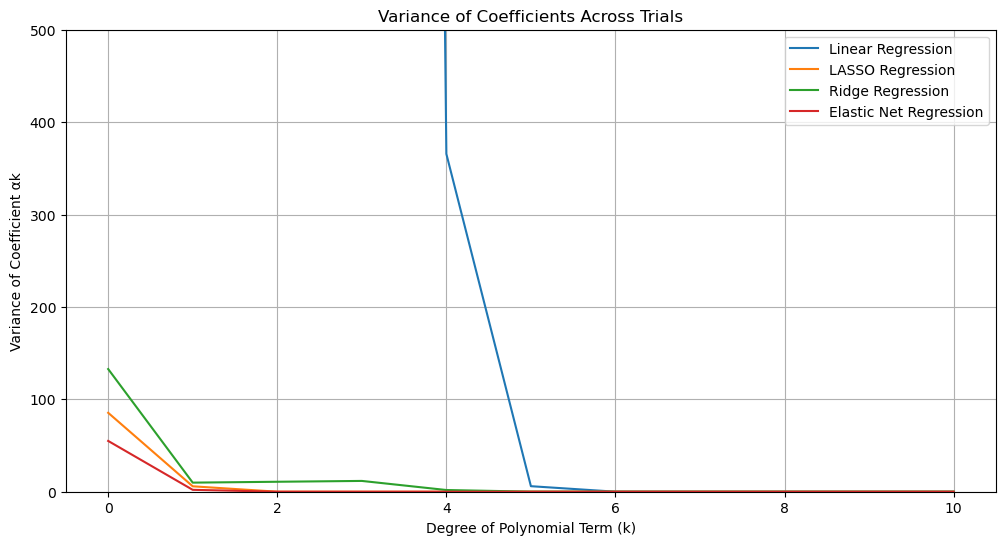

In [14]:
degrees = np.arange(0, 11)
plt.figure(figsize=(12, 6))
plt.ylim(0, 500)
plt.plot(degrees, var_linear, label='Linear Regression')
plt.plot(degrees, var_lasso, label='LASSO Regression')
plt.plot(degrees, var_ridge, label='Ridge Regression')
plt.plot(degrees, var_elastic_net, label='Elastic Net Regression')
plt.xlabel('Degree of Polynomial Term (k)')
plt.ylabel('Variance of Coefficient αk')
plt.title('Variance of Coefficients Across Trials')
plt.legend()
plt.grid(True)
plt.show()

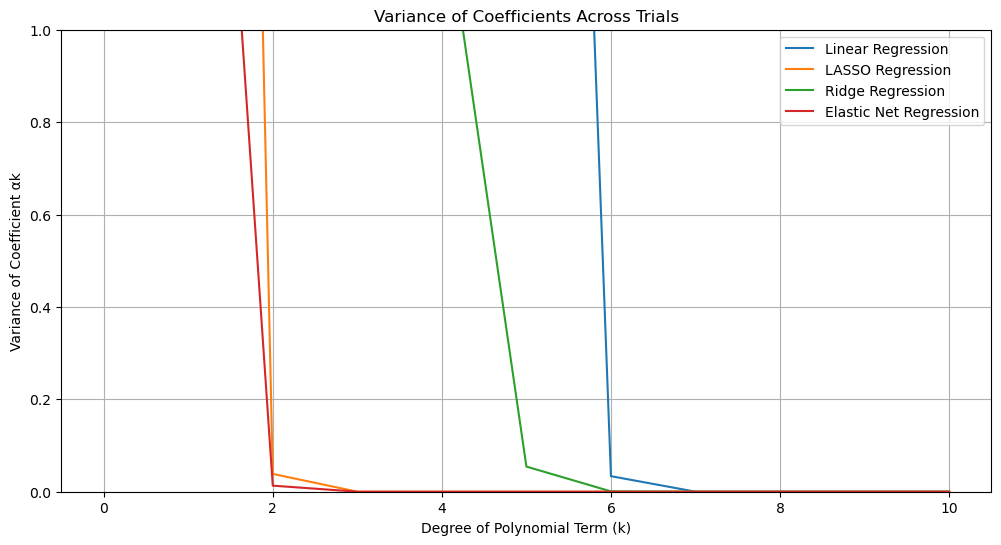

In [20]:
degrees = np.arange(0, 11)
plt.figure(figsize=(12, 6))
plt.ylim(0, 1)
plt.plot(degrees, var_linear, label='Linear Regression')
plt.plot(degrees, var_lasso, label='LASSO Regression')
plt.plot(degrees, var_ridge, label='Ridge Regression')
plt.plot(degrees, var_elastic_net, label='Elastic Net Regression')
plt.xlabel('Degree of Polynomial Term (k)')
plt.ylabel('Variance of Coefficient αk')
plt.title('Variance of Coefficients Across Trials')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 4-4
Download the MNIST data set (both training and test sets and labels) from http://yann.lecun.com/exdb/mnist/. The labels will tell you which digit it is: 1, 2, 3, 4, 5, 6, 7, 8, 9, 0. Let each output
be denoted by the vector $y_j$.

$$
"1" = \begin{bmatrix}
1 \\
0 \\
0 \\
\vdots \\
0
\end{bmatrix},
"2" = \begin{bmatrix}
0 \\
1 \\
0 \\
\vdots \\
0
\end{bmatrix},
\cdots,
"9" = \begin{bmatrix}
0 \\
0 \\
0 \\
\vdots \\
1\\
0
\end{bmatrix},
"0" = \begin{bmatrix}
0 \\
0 \\
0 \\
\vdots \\
0\\
1
\end{bmatrix}
$$

Now let $B$ be the set of output vectors

$$B = [y_1, y_2, \cdots, y_n] $$

and let $A$ be the corresponding reshaped (vectorized) MNIST images

$$A = [x_1, x_2, \cdots, x_n] $$

Thus each vector $x_j \in \mathbb{R}^{n^2}$ is a vector reshaped from the $n \times n$ image of the digit.
Using various $AX=B$ solvers, determine a mapping from the image space to the label space.
By promoting sparsity, determine and rank which pixels in the MNIST set are most informative for correctly labeling the digits. (You will have to come up with your own heuristics or empirical rules for this. Be sure to visualize the results from $X$.) Apply your most important pixels to the test data set to see how accurate you are with as few pixels as possible. Redo the analysis with each digit individually to find the most important pixels for each digit. Think about the interpretation of what you are doing with this $AX = B$ problem.

In [21]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_selection import SelectFromModel

In [22]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)
X_train, X_test = X[:60000], X[60000:]
y_train_raw, y_test_raw = y[:60000], y[60000:]

In [23]:
encoder = OneHotEncoder(sparse=False, categories='auto')
y_train = encoder.fit_transform(y_train_raw.reshape(-1, 1))
y_test = encoder.transform(y_test_raw.reshape(-1, 1))

In [24]:
class ReshapeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X
    
pipeline_ols = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=10000))
])

In [37]:
param_grid_ridge = {
    'regressor__alpha': [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
}

param_grid_lasso = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1]
}

In [38]:
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)
print(f"Best parameters for Ridge: {grid_search_ridge.best_params_}")

Best parameters for Ridge: {'regressor__alpha': 60000}


In [39]:
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)
print(f"Best parameters for Lasso: {grid_search_lasso.best_params_}")

Best parameters for Lasso: {'regressor__alpha': 0.001}


In [40]:
best_ridge = grid_search_ridge.best_estimator_
coefficients_ridge = best_ridge.named_steps['regressor'].coef_

best_lasso = grid_search_lasso.best_estimator_
coefficients_lasso = best_lasso.named_steps['regressor'].coef_

pipeline_ols.fit(X_train, y_train)
coefficients_ols = pipeline_ols.named_steps['regressor'].coef_

In [41]:
pixel_importance_ridge = np.sum(np.abs(coefficients_ridge), axis=0)
pixel_importance_lasso = np.sum(np.abs(coefficients_lasso), axis=0)
pixel_importance_ols = np.sum(np.abs(coefficients_ols), axis=0)

In [42]:
important_pixels_ridge = np.argsort(-pixel_importance_ridge)
important_pixels_lasso = np.argsort(-pixel_importance_lasso)
important_pixels_ols   = np.argsort(-pixel_importance_ols)

In [43]:
def plot_pixel_importance(pixel_importance, title):
    importance_image = pixel_importance.reshape(28, 28)
    plt.imshow(importance_image, cmap='hot')
    plt.title(title)
    plt.colorbar()
    plt.show()

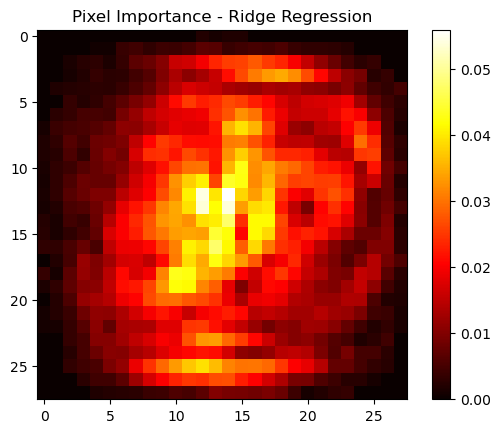

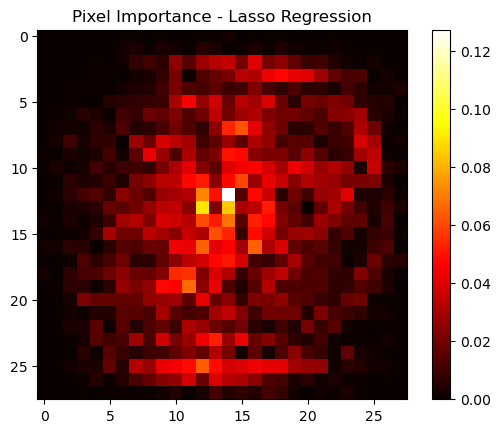

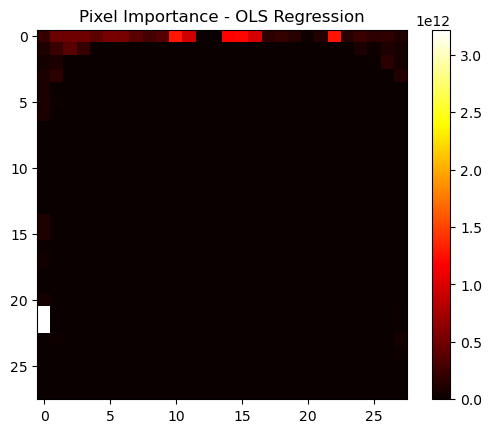

In [44]:
plot_pixel_importance(pixel_importance_ridge, 'Pixel Importance - Ridge Regression')
plot_pixel_importance(pixel_importance_lasso, 'Pixel Importance - Lasso Regression')
plot_pixel_importance(pixel_importance_ols, 'Pixel Importance - OLS Regression')

In [45]:
# Select Pixels Based on Lasso Regression
k = 50  # Number of pixels to select
top_k_pixels = important_pixels_lasso[:k]
X_train_reduced = X_train[:, top_k_pixels]
X_test_reduced = X_test[:, top_k_pixels]

In [46]:
# OLS with reduced data
pipeline_ols_reduced = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Ridge Regression with reduced data
pipeline_ridge_reduced = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=grid_search_ridge.best_params_['regressor__alpha']))
])

# Lasso Regression with reduced data
pipeline_lasso_reduced = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=grid_search_lasso.best_params_['regressor__alpha'], max_iter=10000))
])

In [47]:
pipeline_ols_reduced.fit(X_train_reduced, y_train)
y_pred_ols = pipeline_ols_reduced.predict(X_test_reduced)
y_pred_labels_ols = np.argmax(y_pred_ols, axis=1)
accuracy_ols = accuracy_score(y_test_raw, y_pred_labels_ols)
print(f'Accuracy with OLS using top {k} pixels: {accuracy_ols * 100:.2f}%')

Accuracy with OLS using top 50 pixels: 74.23%


In [48]:
pipeline_ridge_reduced.fit(X_train_reduced, y_train)
y_pred_ridge = pipeline_ridge_reduced.predict(X_test_reduced)
y_pred_labels_ridge = np.argmax(y_pred_ridge, axis=1)
accuracy_ridge = accuracy_score(y_test_raw, y_pred_labels_ridge)
print(f'Accuracy with Ridge using top {k} pixels: {accuracy_ridge * 100:.2f}%')

Accuracy with Ridge using top 50 pixels: 71.14%


In [49]:
pipeline_lasso_reduced.fit(X_train_reduced, y_train)
y_pred_lasso = pipeline_lasso_reduced.predict(X_test_reduced)
y_pred_labels_lasso = np.argmax(y_pred_lasso, axis=1)
accuracy_lasso = accuracy_score(y_test_raw, y_pred_labels_lasso)
print(f'Accuracy with Lasso using top {k} pixels: {accuracy_lasso * 100:.2f}%')

Accuracy with Lasso using top 50 pixels: 73.90%


In [50]:
def per_digit_analysis(digit):
    # Binary labels: 1 for the digit, 0 for others
    y_train_digit = (y_train_raw == digit).astype(int)
    
    # Pipeline for Lasso Regression
    pipeline_lasso_digit = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Lasso(max_iter=10000))
    ])
    
    # Parameter grid
    param_grid_lasso_digit = {
        'regressor__alpha': [0.0001, 0.001, 0.01, 0.1]
    }
    
    # Grid search
    grid_search_lasso_digit = GridSearchCV(pipeline_lasso_digit, param_grid_lasso_digit, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search_lasso_digit.fit(X_train, y_train_digit)
    
    # Get coefficients
    best_lasso_digit = grid_search_lasso_digit.best_estimator_
    coefficients_digit = best_lasso_digit.named_steps['regressor'].coef_
    
    # Plot important pixels
    plot_pixel_importance(np.abs(coefficients_digit), f'Important Pixels for Digit {digit}')

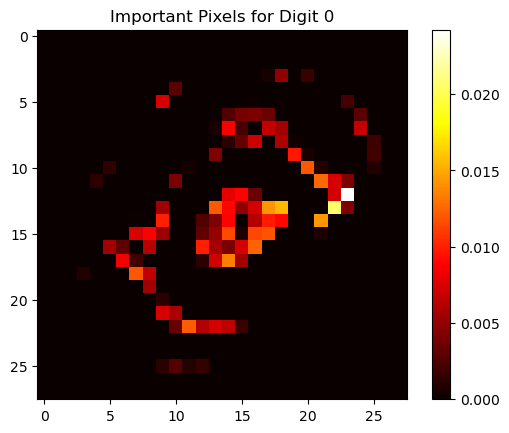

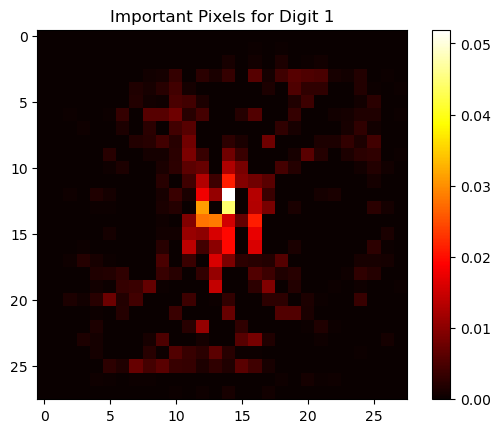

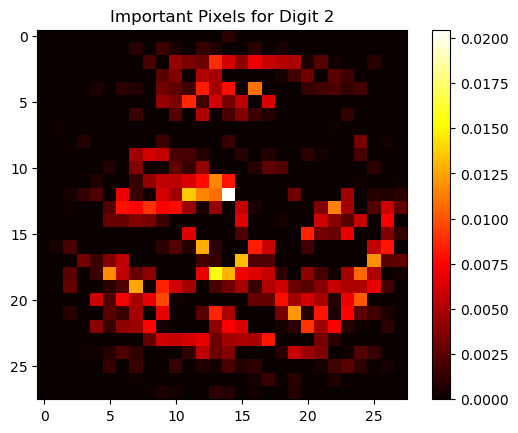

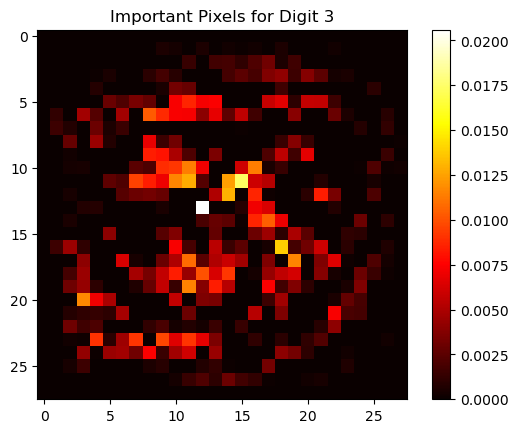

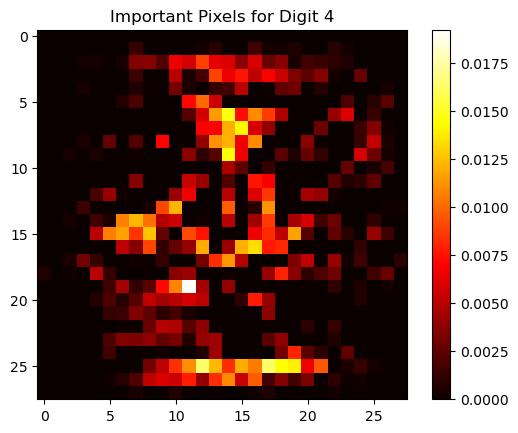

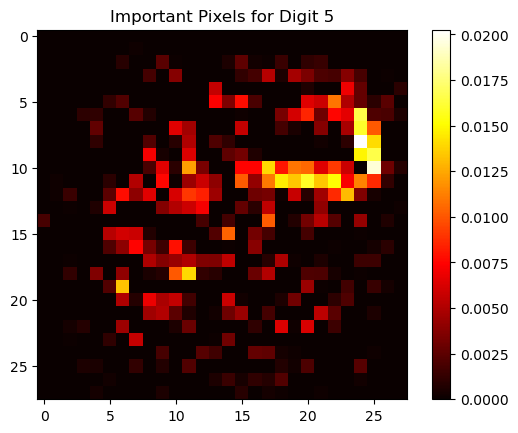

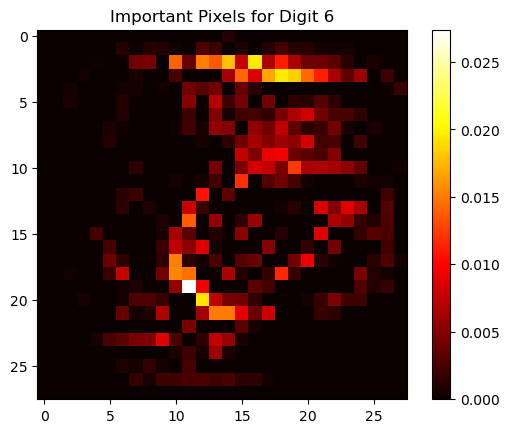

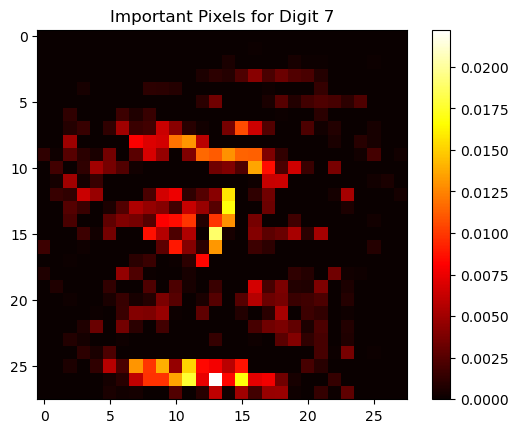

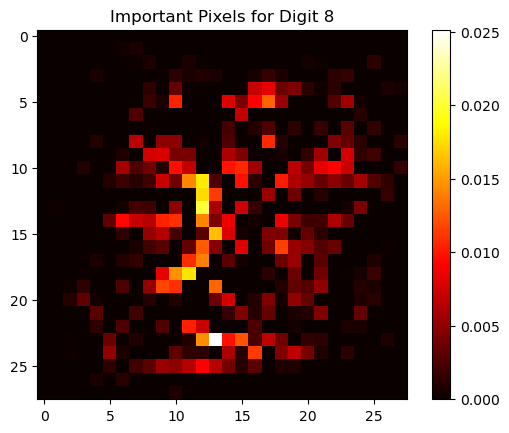

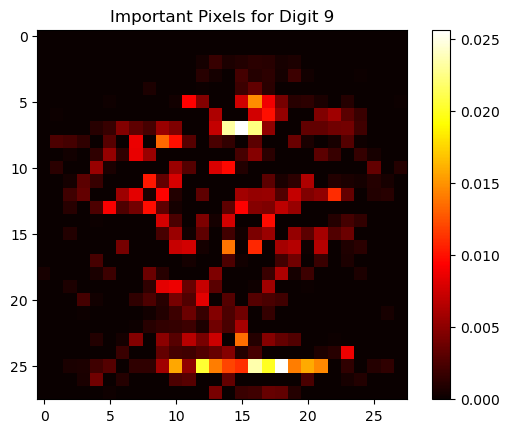

In [51]:
for digit in range(10):
    per_digit_analysis(digit)

Lasso regression, due to its sparsity, helps identify a smaller subset of important pixels.